In [1]:
#1. Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px #plotly express (from plotly interactive graphs)

In [2]:
#2. Read file
booking = pd.read_csv("hotel_bookings.csv")

In [3]:
#3. Clean File
booking=booking.dropna(subset = ['country'])
booking.drop_duplicates(inplace=True)
booking.reset_index(inplace=True)
booking=booking.drop(columns = ['index'])
booking['reservation_status_date'] = pd.to_datetime(booking['reservation_status_date'])

In [4]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86944 entries, 0 to 86943
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86944 non-null  object        
 1   is_canceled                     86944 non-null  int64         
 2   lead_time                       86944 non-null  int64         
 3   arrival_date_year               86944 non-null  int64         
 4   arrival_date_month              86944 non-null  object        
 5   arrival_date_week_number        86944 non-null  int64         
 6   arrival_date_day_of_month       86944 non-null  int64         
 7   stays_in_weekend_nights         86944 non-null  int64         
 8   stays_in_week_nights            86944 non-null  int64         
 9   adults                          86944 non-null  int64         
 10  children                        86940 non-null  float64       
 11  ba

# Data Analysis

### A.Cancellation of Reservation Analysis

#### A1. For Top 10 Countries

In [5]:
top10_countries = booking.groupby('country')['country'].count().sort_values(ascending = False).head(10).index.to_list()
top10_countries

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

Text(0, 0.5, 'Number of reservations')

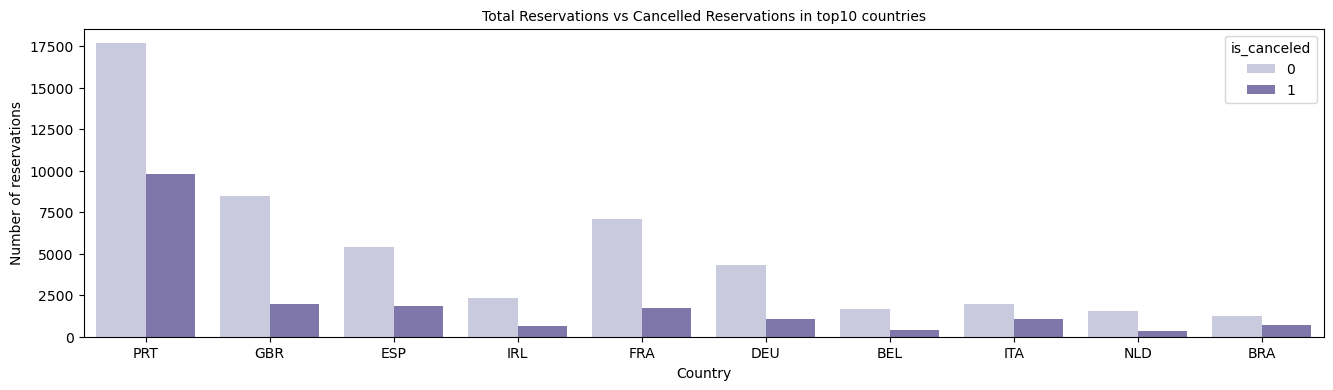

In [6]:
plt.figure(figsize = (16,4))
ax1= sns.countplot(x = 'country', hue = 'is_canceled',data = booking[booking['country'].isin(top10_countries)], palette = 'Purples')
legend_labels,_ = ax1. get_legend_handles_labels()
plt.title('Total Reservations vs Cancelled Reservations in top10 countries',size = 10)
plt.xlabel('Country')
plt.ylabel('Number of reservations')


### A2. Per Market Segment


In [10]:
totals_ms = booking.groupby(['market_segment'])['hotel'].count()
totals_ms.name = 'Total'

In [26]:
cancelled_ms = booking[booking['is_canceled']==1].groupby(['market_segment'])['hotel'].count()
cancelled_ms.name = 'Cancelled'

In [27]:
ms = pd.concat([totals_ms, cancelled_ms], axis=1)
ms['Cancel_prc'] = ms['Cancelled'] *100 / ms['Total']
ms

,Total,Cancelled,Cancel_prc
market_segment,,,
Aviation,227,45,19.823789
Complementary,698,86,12.320917
Corporate,4031,497,12.329447
Direct,11648,1724,14.800824
Groups,4937,1335,27.040713
Offline TA/TO,13857,2057,14.844483
Online TA,51544,18245,35.396942
Undefined,2,2,100.000000


<Axes: ylabel='Cancel_prc'>

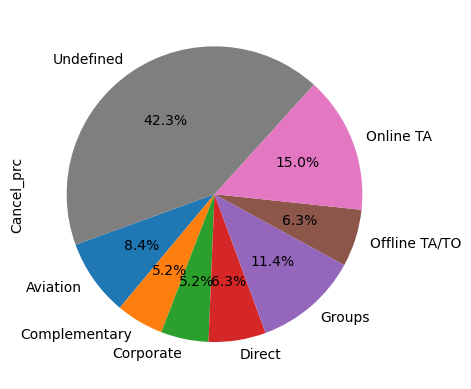

In [28]:
ms['Cancel_prc'].plot.pie(autopct='%1.1f%%',startangle=200, shadow=False)

### A4. Per Hotel Type

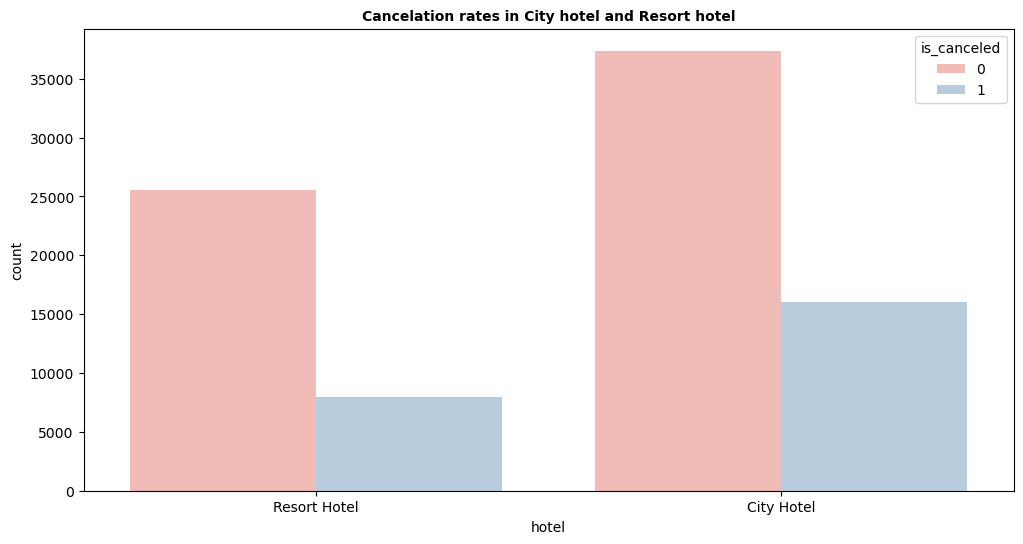

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='hotel',hue="is_canceled", data=booking, palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=10)
plt.show()

### A3. Per leadtime


In [15]:
totals_lt = booking.groupby(['lead_time'])['hotel'].count()
totals_lt.name = 'Total'

In [16]:
cancelled_lt = booking[booking['is_canceled']==1].groupby(['lead_time'])['hotel'].count()
cancelled_lt.name = 'Cancelled'

In [17]:
lt = pd.concat([totals_lt, cancelled_lt], axis=1)
lt['Cancel_prc'] = lt['Cancelled'] *100 / lt['Total']
lt

,Total,Cancelled,Cancel_prc
lead_time,,,
0,5862,344.0,5.868304
1,3152,212.0,6.725888
2,1892,180.0,9.513742
3,1690,169.0,10.000000
4,1552,152.0,9.793814
...,...,...,...
622,2,2.0,100.000000
626,1,1.0,100.000000
629,2,2.0,100.000000


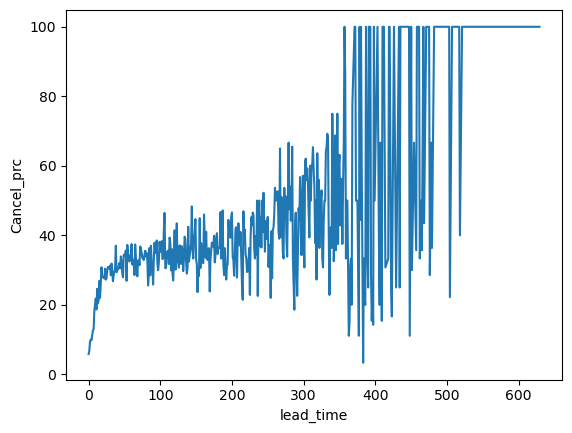

In [18]:
sns.lineplot(x="lead_time", y="Cancel_prc", data=lt) 
plt.show()


### B.Price Analysis
### B1. Per Month / Per Year

In [19]:
booking['month'] =booking['reservation_status_date'].dt.month
booking['year'] =booking['reservation_status_date'].dt.year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


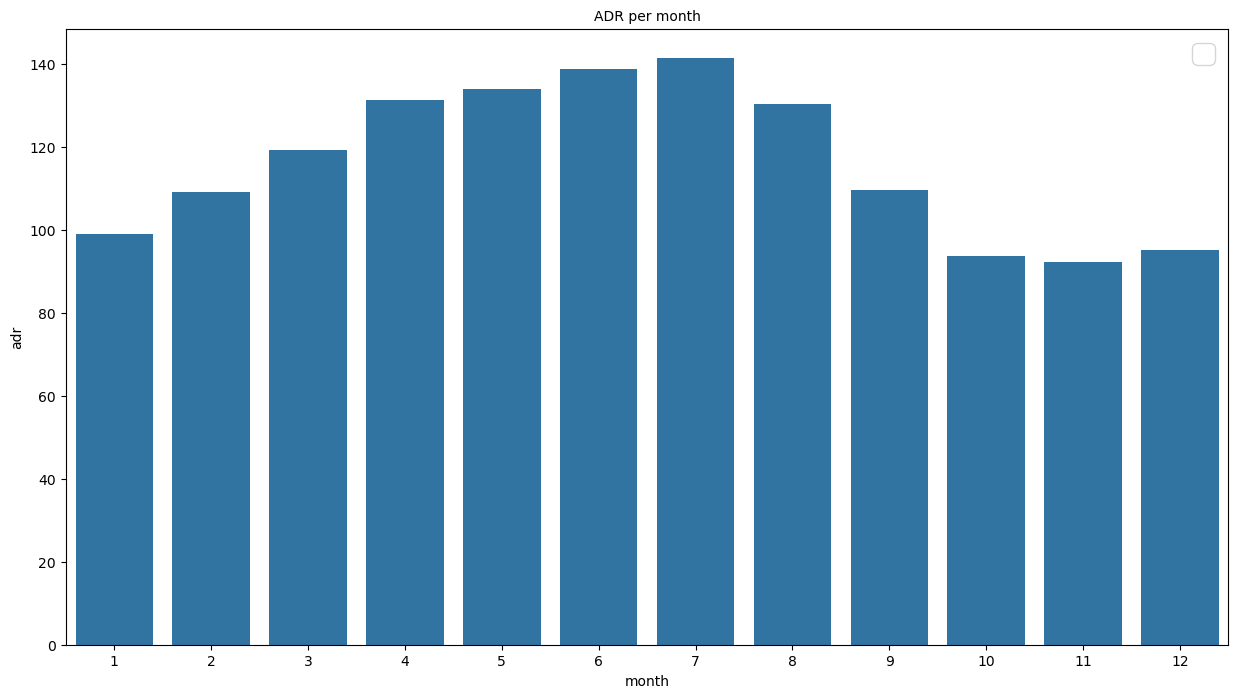

In [20]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=10)
sns.barplot(x='month', y='adr', data=booking[booking['is_canceled'] == 1].groupby('month')[['adr']].mean().reset_index())
plt.legend(fontsize=20)
plt.show()

### B2. Per Year and Month


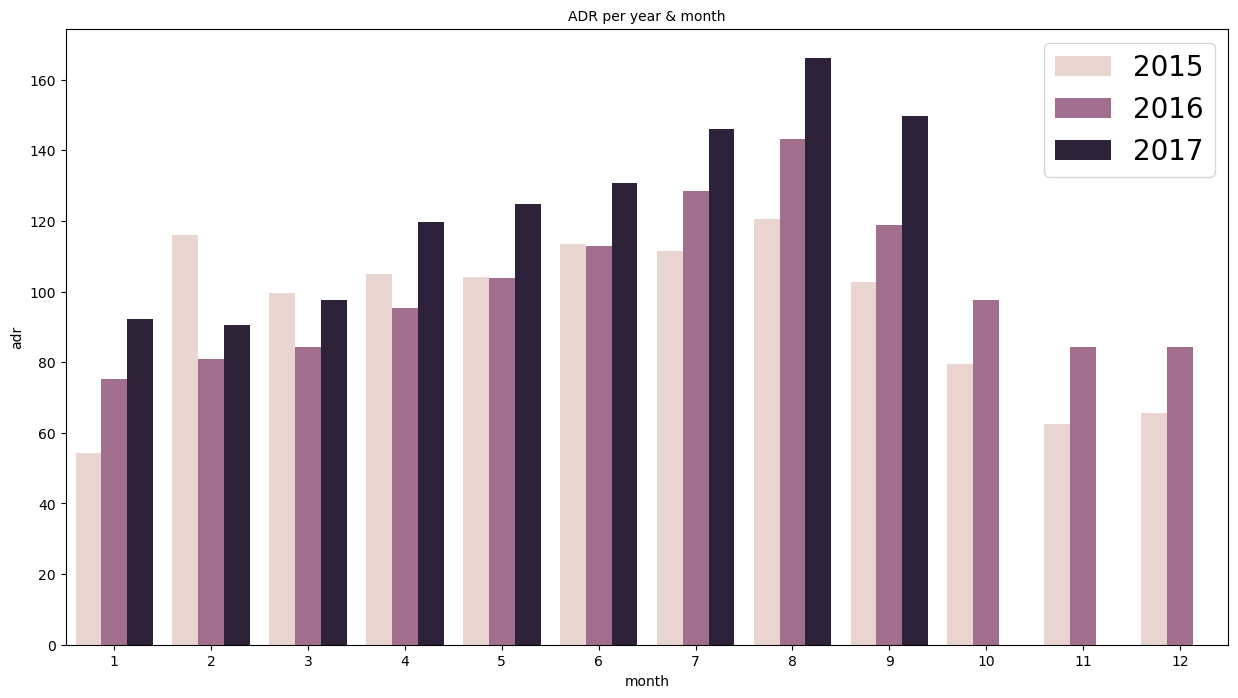

In [21]:
booking.groupby(['year','month'])[['adr']].mean()

plt.figure(figsize=(15, 8))
plt.title('ADR per year & month', fontsize=10)
sns.barplot(x='month', hue='year', y='adr', data=booking[booking['year']>2014].groupby(['year','month'])[['adr']].mean().reset_index())
plt.legend(fontsize=20)
plt.show()

### B3. Per Hotel Type

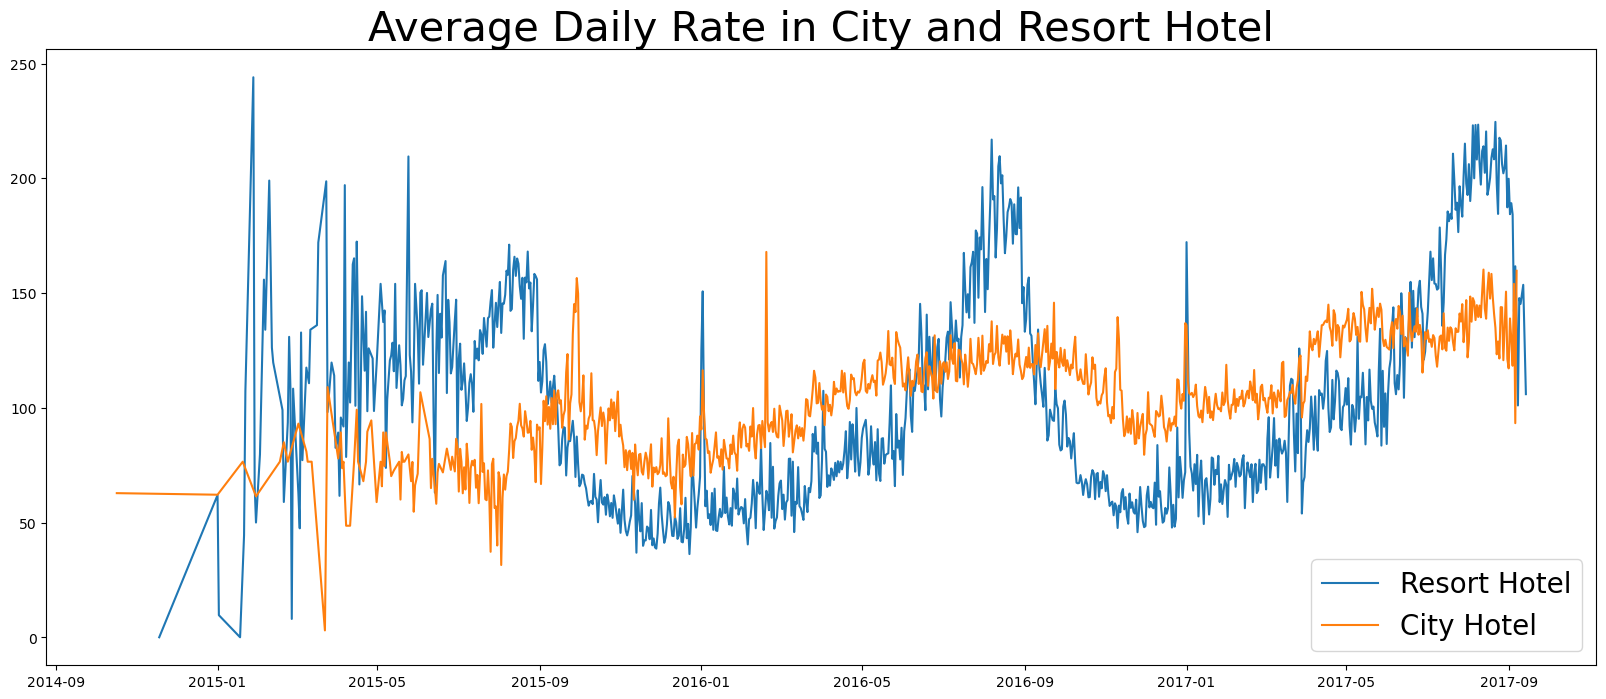

In [22]:
resort_hotel = booking[booking['hotel']=='Resort Hotel'].groupby('reservation_status_date')[['adr']].mean()
city_hotel = booking[booking['hotel']=='City Hotel'].groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()


### C. Reservation Analysis
### C2. Per Market Segment

In [23]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Aviation to Undefined
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   8 non-null      int64
 1   hotel   8 non-null      int64
dtypes: int64(2)
memory usage: 192.0+ bytes


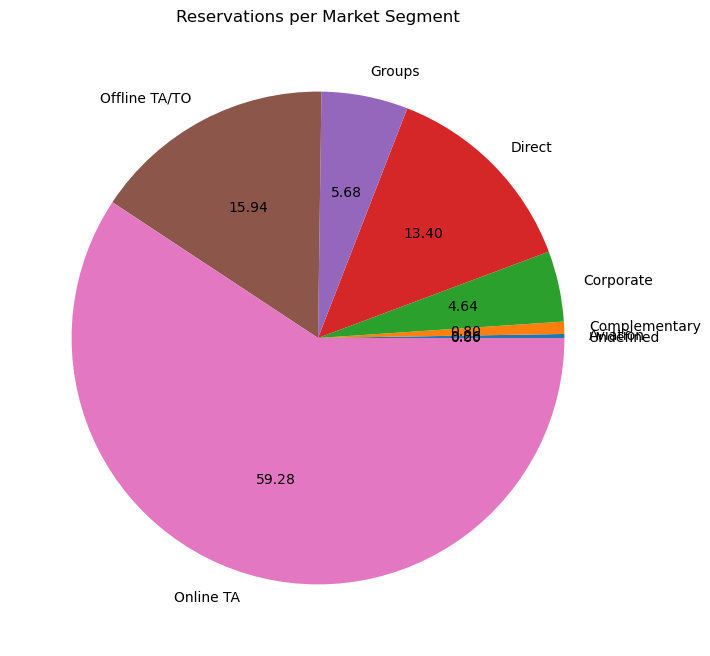

In [24]:
plt.figure(figsize = (8,8))
plt.title('Reservations per Market Segment')
plt.pie(ms['Total'],autopct = '%.2f',labels = ms.index)
plt.show()

### C3. Per Room Type (which type of rooms are most popular)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


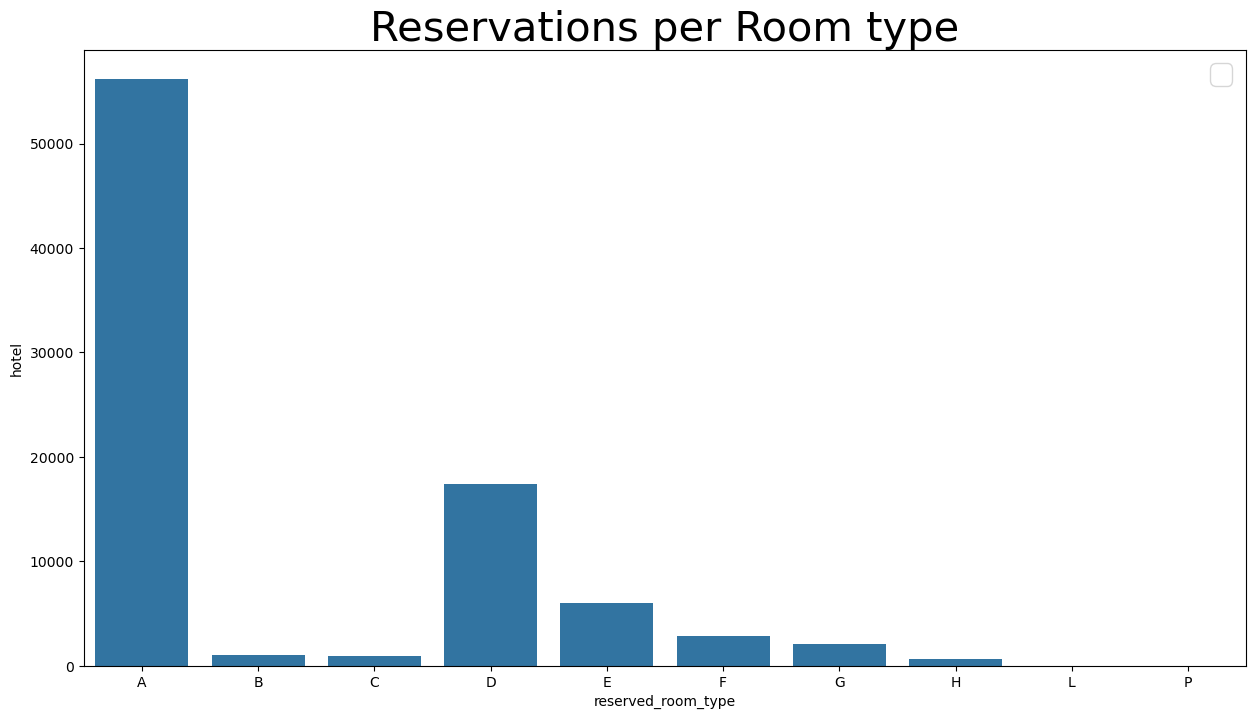

In [25]:
plt.figure(figsize=(15, 8))
plt.title('Reservations per Room type', fontsize=30)
sns.barplot(x='reserved_room_type', y='hotel', data=booking.groupby('reserved_room_type')[['hotel']].count().reset_index())
plt.legend(fontsize=20)
plt.show()